# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | llanes
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | nadi
Processing Record 9 of Set 1 | skovorodino
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | gizo
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | kavaratti
Processing Record 22 of Set 

Processing Record 39 of Set 4 | barah
Processing Record 40 of Set 4 | muroto-misakicho
Processing Record 41 of Set 4 | atafu village
Processing Record 42 of Set 4 | murgud
Processing Record 43 of Set 4 | la'ie
Processing Record 44 of Set 4 | hayma'
City not found. Skipping...
Processing Record 45 of Set 4 | labrador city
Processing Record 46 of Set 4 | chernyshevskiy
Processing Record 47 of Set 4 | yanahuanca
Processing Record 48 of Set 4 | madimba
Processing Record 49 of Set 4 | belyy yar
Processing Record 0 of Set 5 | bamboo flat
Processing Record 1 of Set 5 | phan rang-thap cham
Processing Record 2 of Set 5 | vadso
Processing Record 3 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 5 | quellon
Processing Record 5 of Set 5 | debeljaca
Processing Record 6 of Set 5 | ahau
City not found. Skipping...
Processing Record 7 of Set 5 | cobourg
Processing Record 8 of Set 5 | tofol
Processing Record 9 of Set 5 | papatowai
Processing Record 10 of Set 5 | isafjordur
P

Processing Record 29 of Set 8 | mahdia
Processing Record 30 of Set 8 | iskateley
Processing Record 31 of Set 8 | batyrevo
Processing Record 32 of Set 8 | coihueco
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | vila franca do campo
Processing Record 35 of Set 8 | portage la prairie
Processing Record 36 of Set 8 | birao
Processing Record 37 of Set 8 | truth or consequences
Processing Record 38 of Set 8 | batticaloa
Processing Record 39 of Set 8 | ust'-ilimsk
Processing Record 40 of Set 8 | al musayyib
Processing Record 41 of Set 8 | lodja
Processing Record 42 of Set 8 | mo i rana
Processing Record 43 of Set 8 | zweibrucken
Processing Record 44 of Set 8 | bay roberts
Processing Record 45 of Set 8 | kingston
Processing Record 46 of Set 8 | okhotsk
Processing Record 47 of Set 8 | zhezqazghan
Processing Record 48 of Set 8 | haiku-pauwela
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 0 of Set 9 | baruun-urt
Processing Record 1 of Set 9 | naha
Pro

Processing Record 15 of Set 12 | kiunga
Processing Record 16 of Set 12 | banda aceh
Processing Record 17 of Set 12 | chibougamau
Processing Record 18 of Set 12 | urzhar
Processing Record 19 of Set 12 | as sulayyil
Processing Record 20 of Set 12 | sao tome
Processing Record 21 of Set 12 | babolsar
Processing Record 22 of Set 12 | kunri
Processing Record 23 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 24 of Set 12 | mahenge
Processing Record 25 of Set 12 | ermoupolis
Processing Record 26 of Set 12 | yeniseysk
Processing Record 27 of Set 12 | yamada
Processing Record 28 of Set 12 | kegeyli shahar
Processing Record 29 of Set 12 | howard springs
Processing Record 30 of Set 12 | nadym
Processing Record 31 of Set 12 | oranjemund
Processing Record 32 of Set 12 | las animas
Processing Record 33 of Set 12 | heunghae
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | yanam
Processing Record 36 of Set 12 | poso
Processing Record 37 of Set 12 | chabah

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,16.56,80,0,3.73,ZA,1697593373
1,waitangi,-43.9535,-176.5597,12.68,72,27,2.24,NZ,1697593374
2,avarua,-21.2078,-159.7750,25.03,61,40,7.20,CK,1697593374
3,saint-philippe,-21.3585,55.7679,22.77,77,100,2.32,RE,1697593375
4,punta arenas,-53.1500,-70.9167,9.06,71,75,6.17,CL,1697593376


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,16.56,80,0,3.73,ZA,1697593373
1,waitangi,-43.9535,-176.5597,12.68,72,27,2.24,NZ,1697593374
2,avarua,-21.2078,-159.7750,25.03,61,40,7.20,CK,1697593374
3,saint-philippe,-21.3585,55.7679,22.77,77,100,2.32,RE,1697593375
4,punta arenas,-53.1500,-70.9167,9.06,71,75,6.17,CL,1697593376


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

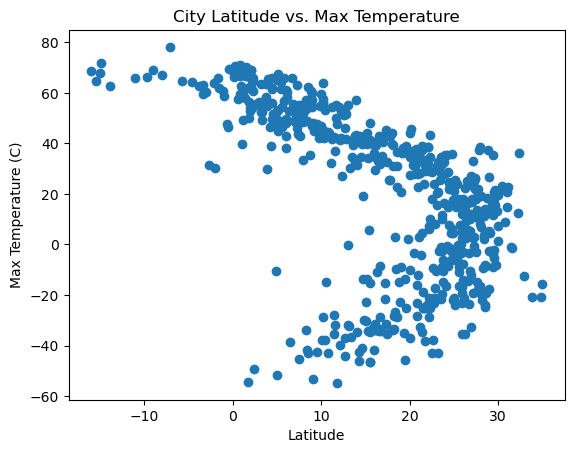

In [53]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

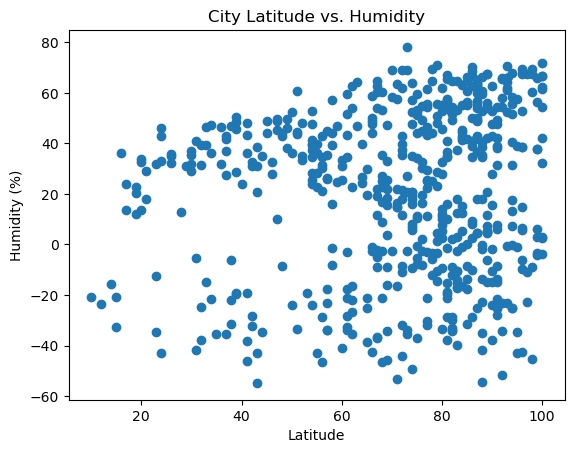

In [54]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

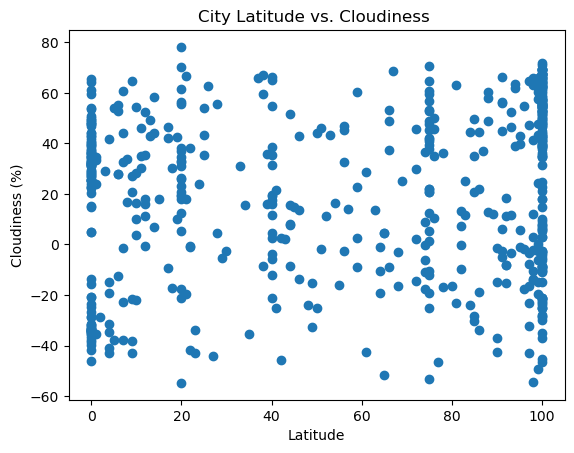

In [55]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

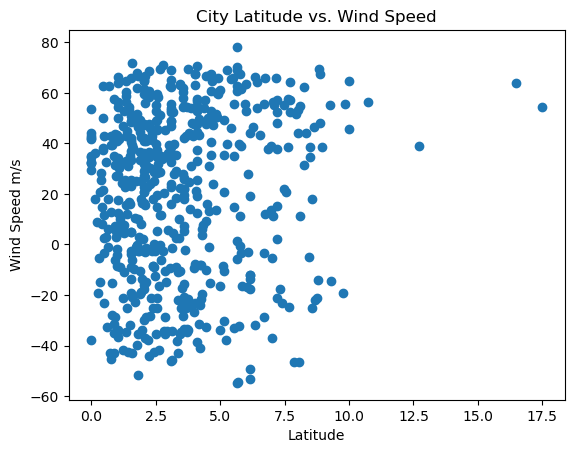

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,llanes,43.4198,-4.7549,22.34,77,99,4.19,ES,1697593377
8,skovorodino,53.9833,123.9167,2.14,62,25,3.88,RU,1697593380
11,sitka,57.0531,-135.3300,13.94,58,100,7.72,US,1697593208
14,bilibino,68.0546,166.4372,-15.02,94,100,1.79,RU,1697593386
15,iqaluit,63.7506,-68.5145,-2.15,74,100,1.03,CA,1697593386


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,16.56,80,0,3.73,ZA,1697593373
1,waitangi,-43.9535,-176.5597,12.68,72,27,2.24,NZ,1697593374
2,avarua,-21.2078,-159.7750,25.03,61,40,7.20,CK,1697593374
3,saint-philippe,-21.3585,55.7679,22.77,77,100,2.32,RE,1697593375
4,punta arenas,-53.1500,-70.9167,9.06,71,75,6.17,CL,1697593376


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8626008845142228


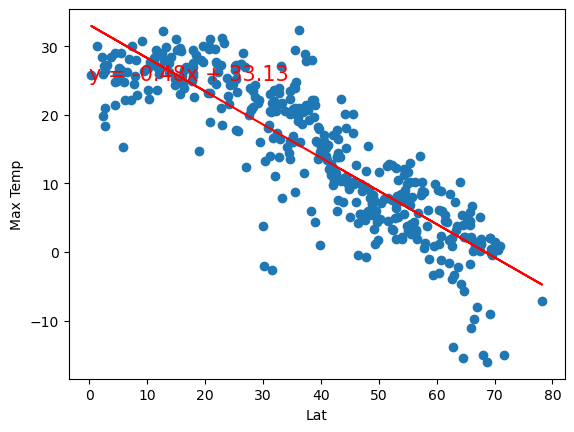

In [60]:
# Linear regression on Northern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

The r-squared is: 0.652339963450941


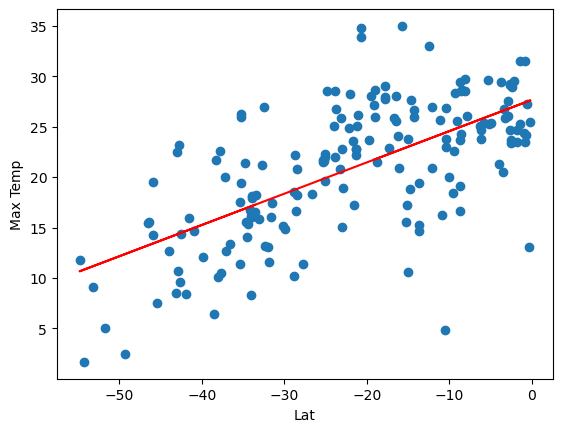

In [61]:
# Linear regression on Southern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,6)

**Discussion about the linear relationship:** 

As we have all grew up learning the closer to the equator you are, this corelates to hotter temperatures and farther away you are corelates to slightly cooler temps. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16148336042263167


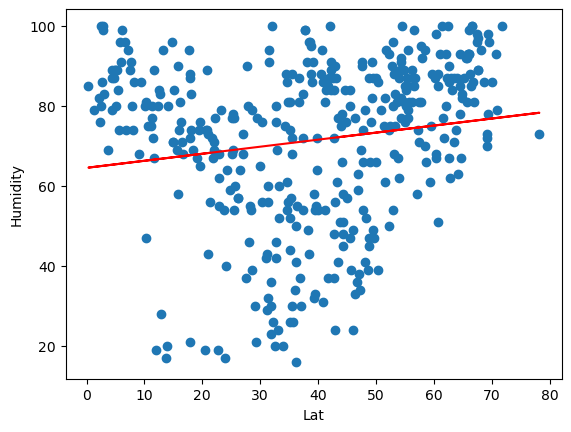

In [62]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.21070631641979642


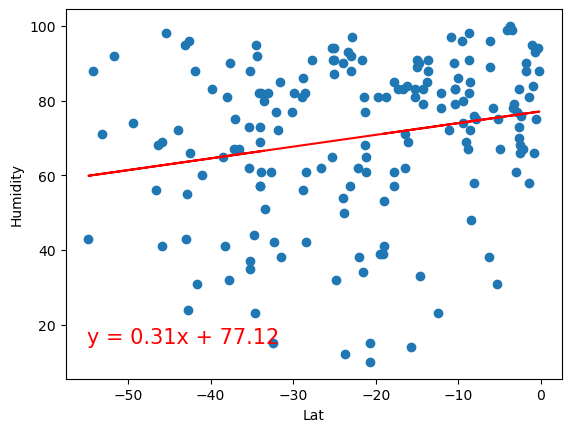

In [63]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,8)

**Discussion about the linear relationship:*

Not much correlation as the scatter plots are aover the place when it relates to humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.24691519090542347


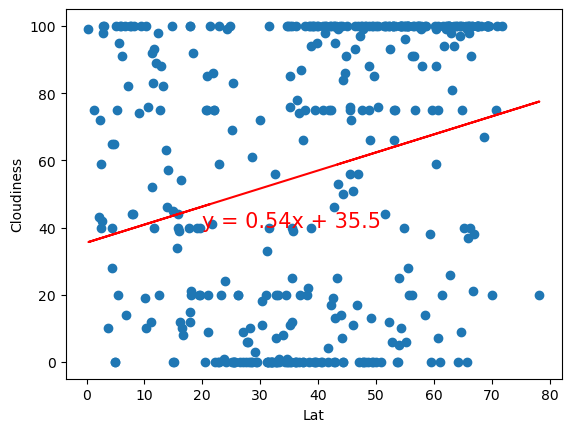

In [64]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: 0.3463154527568284


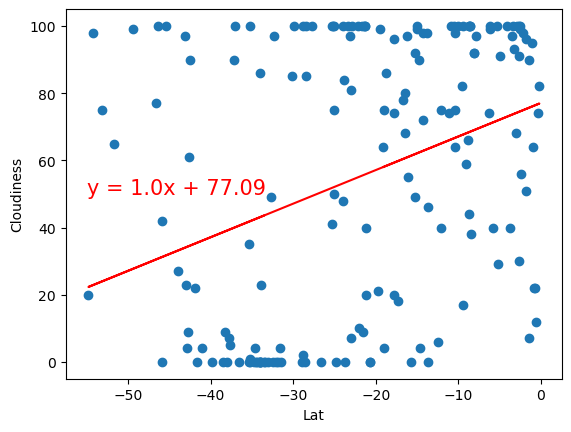

In [65]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,10)

**Discussion about the linear relationship:** 

I do not notice any correlation between cloudiness and latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2575703556078403


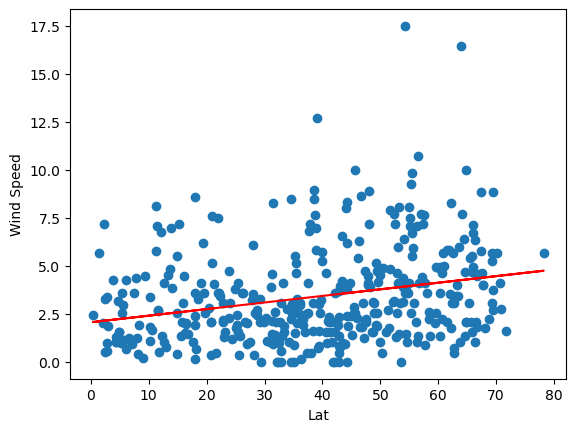

In [66]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,11)

The r-squared is: -0.04892001366069896


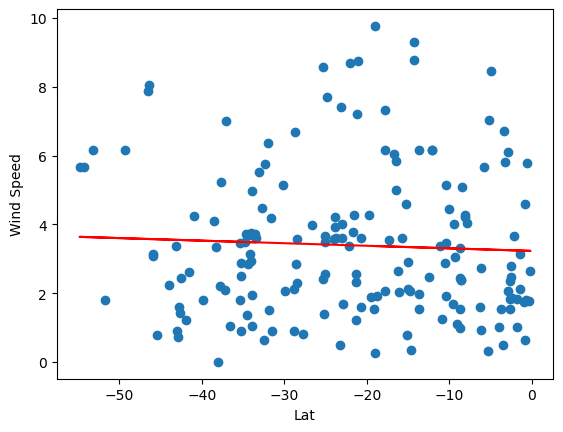

In [67]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,12)

**Discussion about the linear relationship:** 

Not much correlation either as it relates to wind speed to latitude, however it does seem as though the wind speeds are more inconsistent when it comes to the southern hemisphere. The Northern Hempishphere wind speeds are a more a lot closer together when it comes to varying speeds. 